<a href="https://colab.research.google.com/github/nihalsiddiqui7/my_first_cnn_classification/blob/main/CNN_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import tensorflow as tf
import os

In [73]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [74]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [75]:
import cv2
import imghdr

In [76]:
data_dir = '/final_data'

In [77]:
img_extensions=['jpeg','jpg','bmp','png']

In [170]:
import os
import imghdr

def clean_directory(directory):
    removed = 0
    for root, _, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(root, file)
            try:
                img_type = imghdr.what(filepath)
                if img_type not in ['jpeg', 'png', 'bmp', 'gif']:
                    print(f"❌ Removing unsupported format: {filepath}")
                    os.remove(filepath)
                    removed += 1
            except Exception as e:
                print(f"❌ Failed to read: {filepath} — {e}")
                os.remove(filepath)
                removed += 1
    print(f"✅ Removed {removed} invalid or unsupported image(s)")

clean_directory("/final_data")  # or /data depending on your folder


❌ Removing unsupported format: /final_data/happy/istock-508455188-033183f45ba393ed4745b2dd1213c390.jpg
❌ Removing unsupported format: /final_data/happy/depositphotos_53010223-stock-photo-free-happy-girl-on-beach.jpg
❌ Removing unsupported format: /final_data/happy/getty_152414899_97046097045006_68075.webp
❌ Removing unsupported format: /final_data/happy/Happy People.jpg
❌ Removing unsupported format: /final_data/happy/depositphotos_391577690-stock-photo-cheerful-woman-outstretc.jpg
❌ Removing unsupported format: /final_data/happy/getty_478389113_970647970450091_99776.webp
❌ Removing unsupported format: /final_data/sad/depositphotos_241356586-stock-photo-portrait-sad-depressed-y.jpg
❌ Removing unsupported format: /final_data/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
❌ Removing unsupported format: /final_data/sad/man-with-head-down.jpg
❌ Removing unsupported format: /final_data/sad/depositphotos_86851530-stock-photo-close-up-of-african-young.jpg
✅ Removed 10 invalid or

In [171]:
import os
print(os.path.exists("/final_data"))


True


In [172]:
import numpy as np
from matplotlib import pyplot as plt

In [173]:
data = tf.keras.utils.image_dataset_from_directory('/final_data')

Found 134 files belonging to 2 classes.


In [174]:
for batch in data.take(1):
    print("✅ Batch loaded:", batch[0].shape)


✅ Batch loaded: (32, 256, 256, 3)


In [175]:
data_iterator = data.as_numpy_iterator()

In [176]:
batch = data_iterator.next()

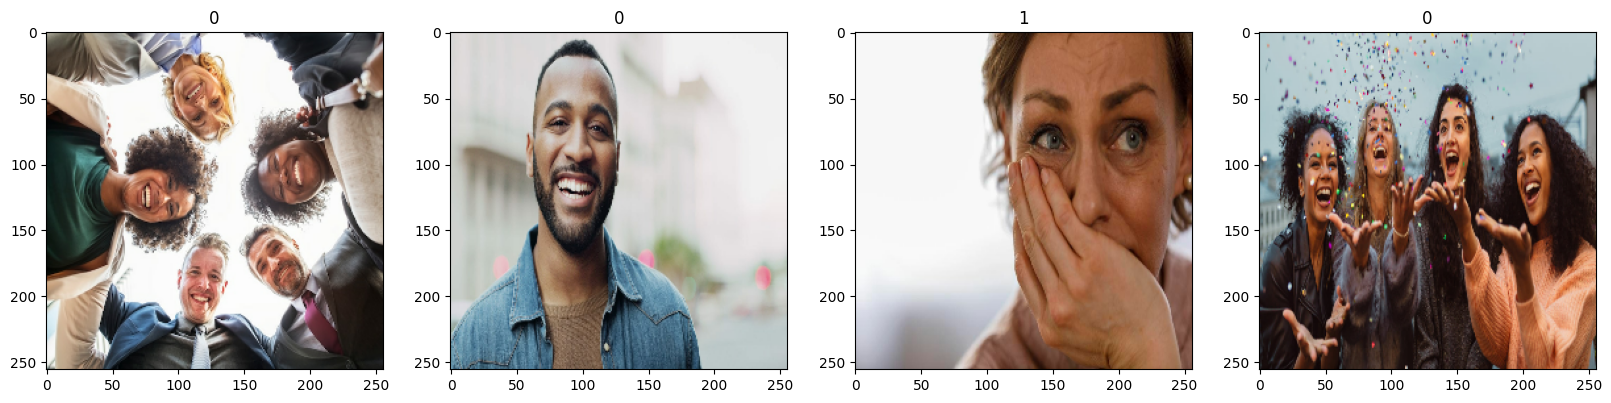

In [177]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [178]:
batch[0].shape

(32, 256, 256, 3)

In [179]:
data = data.map(lambda x,y:(x/255,y))

In [180]:
data.as_numpy_iterator().next()

(array([[[[0.88235295, 0.8862745 , 0.89411765],
          [0.88235295, 0.8862745 , 0.89411765],
          [0.88235295, 0.8862745 , 0.89411765],
          ...,
          [0.85490197, 0.85490197, 0.84705883],
          [0.85490197, 0.85490197, 0.84705883],
          [0.84705883, 0.85490197, 0.8352941 ]],
 
         [[0.88235295, 0.8862745 , 0.89411765],
          [0.88235295, 0.8862745 , 0.89411765],
          [0.88235295, 0.8862745 , 0.89411765],
          ...,
          [0.85490197, 0.85490197, 0.84705883],
          [0.85490197, 0.85490197, 0.84705883],
          [0.8516391 , 0.85816485, 0.8405331 ]],
 
         [[0.88235295, 0.8862745 , 0.89411765],
          [0.88235295, 0.8862745 , 0.89411765],
          [0.88235295, 0.8862745 , 0.89411765],
          ...,
          [0.8564185 , 0.8564185 , 0.84857535],
          [0.85882354, 0.85882354, 0.8509804 ],
          [0.8612285 , 0.85882354, 0.8509804 ]],
 
         ...,
 
         [[0.77254903, 0.8117647 , 0.81960785],
          [0.77254

In [239]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [240]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [241]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout

In [242]:
model = Sequential()

In [243]:
model.add(Conv2D(16, (3,3), activation='relu', input_shape= (256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [244]:
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy,metrics=['accuracy'])

In [297]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

hist = model.fit(train,
                 epochs=30,
                 validation_data=val,
                 )


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 945ms/step - accuracy: 0.8398 - loss: 0.3558 - val_accuracy: 0.8158 - val_loss: 0.4413
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 706ms/step - accuracy: 0.7865 - loss: 0.4112 - val_accuracy: 0.8421 - val_loss: 0.4706
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 806ms/step - accuracy: 0.8190 - loss: 0.3642 - val_accuracy: 1.0000 - val_loss: 0.3963
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 610ms/step - accuracy: 0.8646 - loss: 0.3817 - val_accuracy: 0.8947 - val_loss: 0.4656
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 891ms/step - accuracy: 0.8646 - loss: 0.3064 - val_accuracy: 0.9737 - val_loss: 0.3847
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step - accuracy: 0.8919 - loss: 0.3059 - val_accuracy: 0.8684 - val_loss: 0.4047
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.8763 - loss: 0.2516 - val_accuracy: 0.8947 - val_loss: 0.3321
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 790ms/step - accuracy: 0.9674 - loss: 0.1915 - val_accuracy: 0.9211 - val_loss: 0.

In [298]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,089,877 (42.30 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,393,252 (28.20 MB)

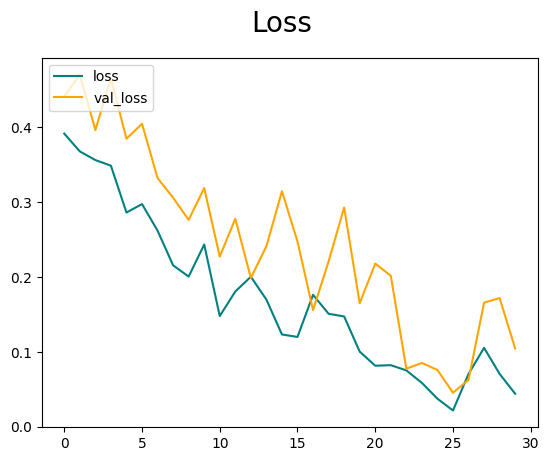

In [299]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


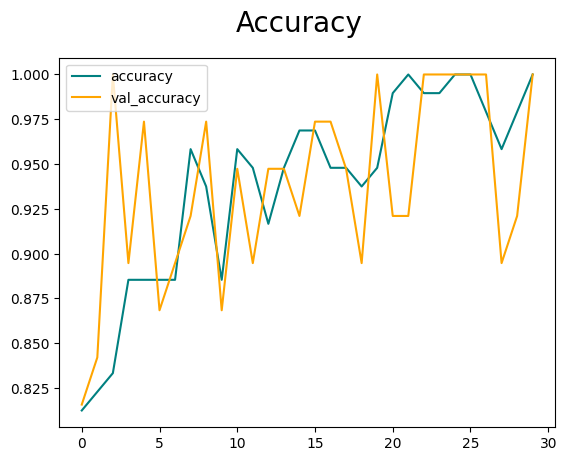

In [300]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [301]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [302]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [303]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [252]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [304]:
import cv2

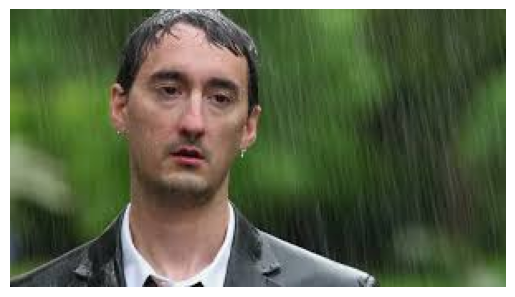

In [329]:
import matplotlib.pyplot as plt

img = cv2.imread('/download.jpg')

if img is None:
    print("❌ Failed to load image. Check the path or file format.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(img)
    plt.axis('off')
    plt.show()

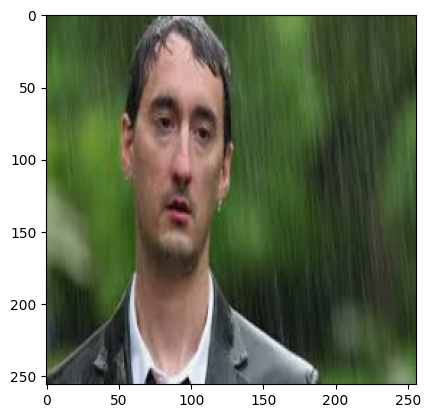

In [330]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [331]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [332]:
yhat
if yhat > 0.5:
  print("Person is sad")
else:
  print("Person is happy")

Person is sad


In [333]:
yhat

array([[0.617173]], dtype=float32)